In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
from pandas.io.json import json_normalize
import time
import matplotlib.pyplot as plt
%matplotlib inline

### 0. 定义方法

In [2]:
def json_to_df(url):
    start_time = time.time()
    with open('tweet_json.txt', 'r') as file:
        basic = []
        for line in file:
            data_list = json.loads(line)
            basic.append([data_list['id'], data_list['retweet_count'], data_list['favorite_count']])
        data_basic = pd.DataFrame(basic, columns=['tweet_id', 'retweet_count', 'favorite_count'])
        data_df = pd.DataFrame()
        data_df = pd.concat([data_df,data_basic], axis=1)
    end_time = time.time()
    print("json_to_df()用时：" + str(end_time - start_time))
    return data_df

In [3]:
def set_stage(datas):
    start_time = time.time()
    datas['dog_stage'] = datas['text'].str.findall('doggo|floofer|pupper|puppo')
    datas = datas.apply(lambda x: stage_format(x), axis = 1)
    end_time = time.time()
    print("set_stage()用时：" + str(end_time - start_time))
    return datas

In [4]:
def stage_format(data):
    data['dog_stage'] = '_'.join(set(data['dog_stage']))
    return data

### 1. 收集数据

In [5]:
df_a = pd.read_csv('twitter-archive-enhanced.csv')

导入twitter-archive-enhanced.csv

In [9]:
url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"

In [10]:
reponse = requests.get(url)

In [12]:
with open(url.split('/')[-1], mode='wb') as file:
    file.write(reponse.content)

In [ ]:
os.listdir()

通过requests库下载image-predictions.tsv

In [6]:
df_i = pd.read_csv('image-predictions.tsv', sep='\t')

导入image-predictions.tsv

In [7]:
df_t = json_to_df('tweet_json.txt')

json_to_df()用时：0.2088909149169922


利用方法json_to_df()，将`tweet_json.txt` json内容文件导入DataFrame

### 2.评估数据 

In [5]:
df_a.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [104]:
pd.set_option('max_colwidth',200)
df_a.query('rating_denominator!=10 | rating_numerator > 20')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [155]:
df_a.rating_numerator.value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [174]:
df_a.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df_i.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_i.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
miniature_pinscher                 20
Samoyed                            20
toy_terrier                        20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [18]:
df_t.head()

,tweet_id,retweet_count,favorite_count,full_text
0,892420643555336193,8842,39492,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6480,33786,This is Tilly. She's just checking pup on you....
2,891815181378084864,4301,25445,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8925,42863,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9721,41016,This is Franklin. He would like you to stop ca...


In [19]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 4 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
full_text         2352 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [21]:
df_t[df_t.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count,full_text


In [27]:
df_a.query('tweet_id == 892420643555336193').text.values

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"],
      dtype=object)

质量问题：

`df_a` 表格：

1.  in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp存在超过1000行的空值（无法清理）

2.  timestamp的数据类型是datetime，不应该是字符串

3.  `df_i` 数据集中，狗狗品种写法规范不统一，有的是全部小写，有的首字母大写，有的用空格分隔有的用下划线分隔。

4.  name, doggo, floofer, pupper, puppo 列中的 "None" 被当作了一个 non-null 的值，在 pandas 中，缺失值应该用 np.nan 来表示；

5.  retweeted_status_id, retweeted_status_user_id 和 retweeted_status_timestamp 存在非空值的转发数据

6.  rating_numerator 评分存在很多提取错误的值

7.  三个数据片段进行合并的时候存在无jpg_url的记录

8.  name 中存在一些提取错误的名字，比如 a, an, the 等很多小写的单词

9. 三个数据片段合并之后，`tweet_id` 的数据类型不应该是int64


清洁度问题：

1. 三个数据片段应该进行合并

2. doggo, floofer, pupper, puppo 这4列数据表示的是dog stage的不同阶段，实际是一个变量的不同值，

### 3. 清理数据

In [8]:
df_a_clean = df_a.copy()
df_i_clean = df_i.copy()
df_t_clean = df_t.copy()

#### 质量：

`df_a` 表格：2. timestamp的数据类型是datetime，不应该是字符串

定义：`pd.to_datetime` 修改timestamp列的数据类型

In [9]:
df_a_clean.timestamp = pd.to_datetime(df_a_clean.timestamp)

测试

In [10]:
df_a_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

3.  df_i 数据集中，狗狗品种写法规范不统一，有的是全部小写，有的首字母大写，有的用空格分隔有的用下划线分隔。

定义：通过`str.capitalize()` 将所有值变为首字母大写，通过`str.replace('-', '_')` 将所有值里的`-` 替换为`_`

In [11]:
df_i_clean['p1'] = df_i_clean.p1.str.capitalize()

In [12]:
df_i_clean.p1 = df_i_clean.p1.str.replace('-', '_')

测试

In [13]:
df_i_clean.p1.str.contains('-').sum()

0

`df_a` 表格：4.  name, doggo, floofer, pupper, puppo 列中的 "None" 被当作了一个 non-null 的值，在 pandas 中，缺失值应该用 np.nan 来表示；

定义：

In [14]:
df_a_clean.replace('None', np.nan,inplace=True)

测试

In [15]:
df_a_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


`df_a` 表格：

5 retweeted_status_id, retweeted_status_user_id 和 retweeted_status_timestamp 存在非空值的转发数据

定义：`drop()` 删除retweeted_status_id, retweeted_status_user_id 和 retweeted_status_timestamp的非空值的转发数据

In [16]:
df_a_clean.drop(df_a_clean[df_a_clean['retweeted_status_id'].notna()].index, axis=0, inplace=True)

In [17]:
df_a_clean.drop(df_a_clean[df_a_clean['retweeted_status_user_id'].notna()].index, axis=0, inplace=True)

In [18]:
df_a_clean.drop(df_a_clean[df_a_clean['retweeted_status_timestamp'].notna()].index, axis=0, inplace=True)

测试

In [19]:
df_a_clean[df_a_clean['retweeted_status_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
df_a_clean[df_a_clean['retweeted_status_user_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
df_a_clean[df_a_clean['retweeted_status_timestamp'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [22]:
df_a_clean[df_a_clean['text'].str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


`df_a` 表格：

8.  name 中存在一些提取错误的名字，比如 a, an, the 等很多小写的单词

定义：`replace()` 将name中小写单词全部以NaN替换。

In [23]:
name_index = df_a_clean[df_a_clean.name.str.len() < 3].index

In [24]:
for index in name_index:
    df_a_clean.name.replace(df_a_clean.name[index], np.nan,inplace=True)

In [25]:
df_a_clean.name = df_a_clean.name.str.capitalize()

测试

In [26]:
df_a_clean[df_a_clean.name.str.istitle() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


`df_a` 表格：

6.  rating_numerator 评分存在很多提取错误的值

定义：通过正则表达式，建立新的列 `rating_nd` ，该列的值为从text获取评分和标准合并的值

In [27]:
df_a_clean['rating_nd'] = df_a_clean.text.str.extract(r'([1-9]\d{0,}\/[1-9]\d{0,}0|[1-9]\d{0,}\.\d{1,}\/[1-9]\d{0,}0)')

测试

In [28]:
df_a_clean['rating_nd'].value_counts()

12/10       500
10/10       443
11/10       425
13/10       308
9/10        156
8/10         98
7/10         53
14/10        44
5/10         34
6/10         32
3/10         19
4/10         15
2/10          9
1/10          7
420/10        2
4/20          2
11.27/10      1
144/120       1
143/130       1
50/50         1
17/10         1
182/10        1
121/110       1
9.5/10        1
45/50         1
80/80         1
99/90         1
44/40         1
15/10         1
60/50         1
84/70         1
13.5/10       1
1776/10       1
9.75/10       1
88/80         1
666/10        1
204/170       1
165/150       1
11.26/10      1
Name: rating_nd, dtype: int64

#### 整洁度：

1  doggo, floofer, pupper, puppo 这4列数据表示的是dog stage的不同阶段，实际是一个变量的不同值，

定义：通过`set_stage()` 方法，从`text` 中重新提取狗狗的stage信息，到新的列dog_stage。

In [29]:
df_a_clean = set_stage(df_a_clean)

set_stage()用时：0.305753231048584


测试

In [30]:
df_a_clean.dog_stage.value_counts()

                1811
pupper           242
doggo             78
puppo             30
pupper_doggo       8
floofer            4
doggo_puppo        2
Name: dog_stage, dtype: int64

2  三个数据片段应该进行合并

质量问题：

7  三个数据片段进行合并的时候存在无jpg_url的记录

定义：根据三个数据表的`tweet_id` ，通过`pd.merge()` 进行复制合并，通过`pd.merge()`时，`how` 选择`inner`参数，删掉无jpg_url的记录数据。删除doggo	floofer	pupper	puppo列，因为已经有了最新的dog_stage对狗狗的stage信息进行记录，删除已经全为空值的retweeted_status_id	retweeted_status_user_id	retweeted_status_timestamp列。

In [31]:
df_a_clean = pd.merge(df_a_clean, df_t_clean, on=['tweet_id'], how='inner')

In [32]:
df_a_clean = pd.merge(df_a_clean, df_i_clean[['tweet_id', 'p1_conf', 'p1', 'p1_dog']], on=['tweet_id'],how='inner')

质量问题：

`df_a` 表格：

9.  tweet_id 的数据类型不应该是int64

定义：将的数据类型修订为`string`

In [33]:
df_a_clean.tweet_id = str(df_a_clean.tweet_id)

测试

In [34]:
type(df_a_clean.tweet_id[0])

str

In [35]:
df_a_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1373 non-null object
doggo                         74 non-null object
floofer                       8 non-null object
pupper                        212 non-null object
puppo                         23 non-null object
rating_nd                     1991 n

In [36]:
df_a_clean.drop(['doggo', 'floofer', 'pupper','puppo', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1,inplace=True)

In [38]:
df_a_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1373 non-null object
rating_nd                1991 non-null object
dog_stage                1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
p1_conf                  1994 non-null float64
p1                       1994 non-null object
p1_dog                   1994 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 346.8+ KB


In [39]:
df_a_clean.to_csv('twitter_archive_master.csv', index=False)

### 4. 可视化：

In [40]:
df_a_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_nd,dog_stage,retweet_count,favorite_count,p1_conf,p1,p1_dog
0,0 892420643555336193\n1 8921774213...,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13/10,,8842,39492,0.097049,Orange,False
1,0 892420643555336193\n1 8921774213...,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,,6480,33786,0.323581,Chihuahua,True
2,0 892420643555336193\n1 8921774213...,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,,4301,25445,0.716012,Chihuahua,True
3,0 892420643555336193\n1 8921774213...,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,,8925,42863,0.170278,Paper_towel,False
4,0 892420643555336193\n1 8921774213...,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12/10,,9721,41016,0.555712,Basset,True


In [41]:
df_dog = df_a_clean.query('p1_dog == True')

In [42]:
df_retweet = df_dog.groupby(['p1'])['retweet_count'].sum()

In [43]:
df_retweet.sort_values(ascending=False)

p1
Golden_retriever                  505153
Labrador_retriever                364632
Pembroke                          278975
Chihuahua                         219521
Samoyed                           183897
French_bulldog                    121066
Chow                              118926
Pomeranian                        108798
Cocker_spaniel                    100024
Pug                                98675
Toy_poodle                         92913
Eskimo_dog                         85364
Cardigan                           76732
Malamute                           73377
Lakeland_terrier                   71284
Great_pyrenees                     65856
Chesapeake_bay_retriever           65146
English_springer                   53538
Miniature_pinscher                 53413
German_shepherd                    52861
Staffordshire_bullterrier          46607
Standard_poodle                    46215
Shetland_sheepdog                  43176
Basset                             42196
Rottweiler   

#### 见解：1. 转发量最高的狗狗品种是golden_retriever，最低的是groenendael

In [44]:
df_favorite = df_dog.groupby(['p1'])['favorite_count'].sum()

In [45]:
df_favorite.sort_values(ascending=False)

p1
Golden_retriever               1707334
Labrador_retriever             1119555
Pembroke                        991762
Chihuahua                       673987
Samoyed                         541345
French_bulldog                  464224
Chow                            414190
Pug                             319099
Cocker_spaniel                  314695
Pomeranian                      307922
Cardigan                        259279
Toy_poodle                      251410
Malamute                        248217
Chesapeake_bay_retriever        242669
Eskimo_dog                      215189
Lakeland_terrier                206525
German_shepherd                 202328
Miniature_pinscher              191336
Staffordshire_bullterrier       186343
Great_pyrenees                  180297
Basset                          179791
Shetland_sheepdog               153996
English_springer                140681
Siberian_husky                  139715
Italian_greyhound               139168
Flat_coated_retriever 

#### 见解：2. 最受喜爱的狗狗品种是golden_retriever

In [46]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [47]:
df_is_dog = df_a_clean.p1_dog.value_counts()

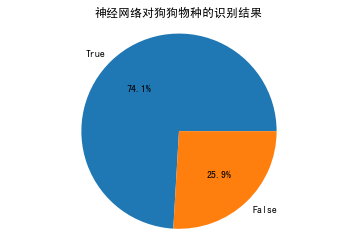

<Figure size 720x720 with 0 Axes>

In [48]:
fig1, ax1 = plt.subplots()
ax1.pie(df_is_dog, labels=['True', 'False'], autopct='%1.1f%%')
ax1.axis('equal')
plt.title(u'神经网络对狗狗物种的识别结果')
plt.figure(num=20, figsize=(10,10))
plt.show()

#### 见解：3. 根据神经网络对狗狗物种的识别结果，神经网络预测图片属于“狗”的占比达到74.1%